<div class="alert alert-block alert-success">
    <p><b>IRONHACK - DATA ANALYSIS FT - JAN22</b></p>
    <i><b>PROJECT:</b> Data cleaning and manipulation - Shark Attack</i>
</div>

---

<div class="alert alert-block alert-info">
    <p><b>Import Libs:</b></p>
</div>

In [112]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib as plt
import re
import time
from pandas_profiling import ProfileReport
from datetime import datetime
from bs4 import BeautifulSoup
import dateparser
import requests

<div class="alert alert-block alert-info">
<b>Read CSV and identify encodig:</b></div>

In [117]:
shark_data = pd.read_csv("data/attacks.csv", encoding="latin1")
#DataSet documentation: https://www.sharkattackfile.net/
moonp = pd.read_csv("gun_da_lua.csv")
mp_cols = "New Moon","First Quarter","Full Moon", "Third Quarter"
#for year in tqdm(range(1800,2020)):
    #globals()[f"df{year}"] = pd.read_html(f'https://www.timeanddate.com/moon/phases/?year={year}')[1]

# for year in range(1800,2020):
#     for mp in mp_cols:
#         globals()f'df{year}{[mp]}' = (globals()[f'df{year}{[mp]}']+f'/{year}').str.replace(' ','/')
#         globals()f'df{year}{[mp]}'.apply(lambda y: datetime.strptime(y, '%d/%b/%Y') if isinstance(y,str) and not y.startswith('*/All/times/') else np.nan)


#    pd.to_datetime(moonp[mp])


#df['New Moon'].apply(lambda x: datetime.strptime(x, '%d/%b/%Y') if isinstance(x,str) and not x.startswith('*/All/times/') else np.nan)


In [119]:
moonp.transpose()


,0
New Moon,New Moon
First Quarter,First Quarter
Full Moon,Full Moon
Third Quarter,Third Quarter


<div class="alert alert-block alert-success">
<b>DataSet Preview:</b> Head, info, describe and dtypes</div>

In [32]:
shark_data.head(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [33]:
shark_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [34]:
shark_data.describe()

,Year,original order
count,6300.000000,6309.000000
mean,1927.272381,3155.999683
std,281.116308,1821.396206
min,0.000000,2.000000
25%,1942.000000,1579.000000
50%,1977.000000,3156.000000
75%,2005.000000,4733.000000
max,2018.000000,6310.000000


In [37]:
shark_data.dtypes

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

In [40]:
sns.heatmap(shark_data.isnull())

<AxesSubplot:>

In [41]:
moonp.head(5)

,Lunation,New Moon,New Moon.1,First Quarter,First Quarter.1,Full Moon,Full Moon.1,Third Quarter,Third Quarter.1,Duration
0,730,nan de 1982,NaN,3 de Jan de 1982,01:45,9 de Jan de 1982,16:52,16 de Jan de 1982,20:57,29d 18h 46m
1,731,25 de Jan de 1982,01:55,1 de Fev de 1982,11:27,8 de Fev de 1982,04:57,15 de Fev de 1982,17:20,29d 16h 17m
2,732,23 de Fev de 1982,18:13,2 de Mar de 1982,19:15,9 de Mar de 1982,17:45,17 de Mar de 1982,14:14,29d 13h 04m
3,733,25 de Mar de 1982,07:17,1 de Abr de 1982,02:08,8 de Abr de 1982,07:18,16 de Abr de 1982,09:42,29d 10h 11m
4,734,23 de Abr de 1982,17:28,30 de Abr de 1982,09:07,7 de Mai de 1982,21:44,16 de Mai de 1982,02:11,29d 8h 12m


In [36]:
moonp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Lunation         14 non-null     object
 1   New Moon         14 non-null     object
 2   New Moon.1       13 non-null     object
 3   First Quarter    14 non-null     object
 4   First Quarter.1  14 non-null     object
 5   Full Moon        14 non-null     object
 6   Full Moon.1      14 non-null     object
 7   Third Quarter    14 non-null     object
 8   Third Quarter.1  13 non-null     object
 9   Duration         14 non-null     object
dtypes: object(10)
memory usage: 1.2+ KB


<div class="alert alert-block alert-success">
<b>Data cleaning and manipulation.</b></div>

In [ ]:
# Moon phase columns: "New Moon","First Quarter","Full Moon", "Third Quarter"]
#mp_cols = "New Moon","First Quarter","Full Moon", "Third Quarter"
for mp in mp_cols:
    moonp[mp] = moonp[mp].map('{} de 1982'.format)

#for mp in mp_cols:
#    pd.to_datetime(moonp[mp])

In [31]:
shark_data#[shark_data.isnull()]
#shark_data[shark_data.isna().sum(axis=1) >= 1]

C:\Users\Rfbj\AppData\Local\Temp\ipykernel_12608\2405535729.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  shark_data[shark_data.isna().count() >= 1]#.sort_values(by="ViewCount", ascending=True)


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

<div class="alert alert-block alert-warning">
    <p> Identify and modify data types, if needed.</p>
</div>

In [35]:
#check data types
shark_data.info()
#shark_data.astype({"Date":"datetime6", "Year":"int64","Age":"int64"})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

<div class="alert alert-block alert-warning">
    <p>Identify droppable columns / blank cells.</p></div>

<AxesSubplot:>

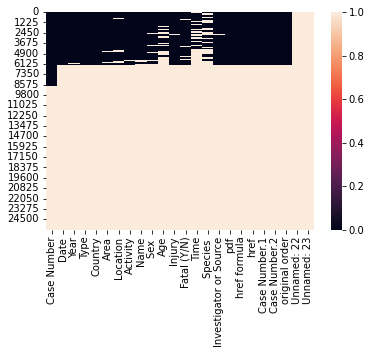

In [51]:
sns.heatmap(shark_data.isnull())

#Where should our company install its headquarters at?
#Country where we have had the highest number of cases - USA
#what would be our company's business purpose? Should we sell a product (i.e. Shark repelent), provide a service to warn or
#educate bathers/swimmers
#It depends on what triggered the attack: Predatory or provocative behavior?
#What would be our target audience? (Government, customers (male, female, does not matter?), ecc)
#
##What countries have the most shark attacks
##What countries have the deadliest shark attacks
##Shark attacks progression through years
#What season of the year are shark attacks more prevalent
#Shark attacks per country filtered by gender - Should women or men wear any kind of protective device/shark repelent?

In [4]:
#!pip install pandas-profiling


  Using cached pandas_profiling-3.1.0-py2.py3-none-any.whl (261 kB)
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Using cached phik-0.12.0.tar.gz (44 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached visions-0.7.4-py3-none-any.whl (102 kB)
  Using cached tangled_up_in_unicode-0.1.0-py3-none-any.whl (3.1 MB)
  Using cached multimethod-1.6-py3-none-any.whl (9.4 kB)
  Using cached htmlmin-0.1.12-py3-none-any.whl
  Using cached missingno-0.5.0-py3-none-any.whl (8.8 kB)
  Using cached pydantic-1.9.0-cp310-cp310-win_amd64.whl (2.1 MB)
  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
  Using cached networkx-2.6.3-py3-none-any.whl (1.9 MB)
  Using cached ImageHash-4.2.1-py2.py3-n

In [48]:

#shark_data#["Country"]]

  Using cached pip-21.3.1-py3-none-any.whl (1.7 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.1.2


ERROR: Could not install packages due to an OSError: [WinError 5] Acesso negado: 'C:\\Users\\Rfbj\\AppData\\Local\\Temp\\pip-uninstall-w0h3g8pl\\pip.exe'

    Uninstalling pip-21.1.2:
      Successfully uninstalled pip-21.1.2



Check the permissions.



In [39]:
null_cols = shark_data.isnull().sum(axis=1) #crio a máscara que soma a quantidade de dados nulos
null_cols[null_cols > 0] #aplico a máscara
shark_data.drop()


0         2
1         3
2         3
3         4
4         4
         ..
25718    24
25719    24
25720    24
25721    24
25722    23
Length: 25723, dtype: int64